In [ ]:
!pip install pycryptodome
from Crypto.Cipher import AES
from Crypto.Hash import SHA256, SHA512
from Crypto.Random import get_random_bytes
from Crypto.Util.Padding import pad
from Crypto.PublicKey import RSA
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [ ]:
blocks = [16, 64, 256, 1024, 8192, 16384]

# Скорость шифрования AES

In [ ]:
# def measure_AES_speed():
measures_AES = []
for block in blocks:
    data = get_random_bytes(block)
    key = get_random_bytes(32)
    iv = get_random_bytes(16)
    cipher = AES.new(key, AES.MODE_CBC, iv=iv)
    a = %timeit -o cipher.encrypt(pad(data, AES.block_size))
    measures_AES.append(np.mean(a.all_runs))
    # return measures

The slowest run took 273.26 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 4.45 µs per loop
The slowest run took 4.86 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 4.55 µs per loop
The slowest run took 4.53 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 5.12 µs per loop
The slowest run took 5.63 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 6.76 µs per loop
The slowest run took 4.86 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 22.2 µs per loop
10000 loops, best of 5: 40.5 µs per loop


In [ ]:
measures_AES

[0.4753024566009117,
 0.47111643300013384,
 0.5202135963998444,
 0.6977971226006048,
 0.22632523420033976,
 0.40765817260107723]

# Скорость SHA256

In [ ]:
# def measure_SHA256_speed():
measures_SHA256 = []
for block in blocks:
    data = get_random_bytes(block)
    hash_object = SHA256.new(data)
    a = %timeit -o hash_object.digest()
    measures_SHA256.append(np.mean(a.all_runs))
    # return measures

The slowest run took 68.21 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 2.49 µs per loop
The slowest run took 5.32 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 2.45 µs per loop
The slowest run took 6.44 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 2.53 µs per loop
The slowest run took 6.14 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 2.49 µs per loop
The slowest run took 6.33 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 2.48 µs per loop
The slowest run took 6.13 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 2.47 µs per loop


In [ ]:
measures_SHA256

[0.2557844129994919,
 0.2516272819993901,
 0.25525778719966186,
 0.2542920400002913,
 0.2570922049984802,
 0.2516652723999869]

# Скорость SHA512

In [ ]:
measures_SHA512 = []
for block in blocks:
    data = get_random_bytes(block)
    hash_object = SHA512.new(data)
    a = %timeit -o hash_object.digest()
    measures_SHA512.append(np.mean(a.all_runs))

The slowest run took 39.21 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 2.61 µs per loop
The slowest run took 6.07 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 2.58 µs per loop
The slowest run took 5.36 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 2.59 µs per loop
The slowest run took 5.95 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 2.6 µs per loop
The slowest run took 5.69 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 2.64 µs per loop
The slowest run took 5.54 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 2.6 µs per loop


In [ ]:
measures_SHA512

[0.26738396900036604,
 0.2647209078000742,
 0.2690132652001921,
 0.2643862063996494,
 0.2674928758009628,
 0.267132725600095]

# Скорость создания пары ключей RSA

In [ ]:
RSA_blocks = [1024, 2048, 4096, 8192]
keypair_measures_RSA = []
for block in RSA_blocks:
    a = %timeit -o key = RSA.generate(block)
    keypair_measures_RSA.append(np.mean(a.all_runs))

10 loops, best of 5: 141 ms per loop
1 loop, best of 5: 380 ms per loop
The slowest run took 4.87 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 5: 1.9 s per loop
The slowest run took 8.13 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 5: 13.7 s per loop


In [ ]:
keypair_measures_RSA

[1.5264911545993527, 0.7257511872005125, 3.6195750465994934, 51.91353893199994]

In [ ]:
from Crypto.Signature import pkcs1_15

# Скорость подписи и проверки подписи RSA

In [ ]:
#sign/verify
signature_measures = []
verify_measures = []
for block in RSA_blocks:
    data = get_random_bytes(1024)
    hash = SHA512.new(data)
    k = RSA.generate(block)
    pkcs = pkcs1_15.new(k)
    signature = pkcs.sign(hash)
    a = %timeit -o pkcs.sign(hash)
    b = %timeit -o pkcs.verify(SHA512.new(data), signature)
    signature_measures.append(np.mean(a.all_runs))
    verify_measures.append(np.mean(b.all_runs))

1000 loops, best of 5: 1.15 ms per loop
1000 loops, best of 5: 445 µs per loop
100 loops, best of 5: 2.72 ms per loop
1000 loops, best of 5: 860 µs per loop
100 loops, best of 5: 10.2 ms per loop
100 loops, best of 5: 1.89 ms per loop
10 loops, best of 5: 52.9 ms per loop
100 loops, best of 5: 4.89 ms per loop


In [ ]:
signature_measures

[1.1785568484003306,
 0.2772046040001442,
 1.0314513619996433,
 0.5386263647997112]

In [ ]:
verify_measures

[0.4658859688002849, 0.8673194899994996, 0.193736295200506, 0.4934858251988771]

# Объем используемой памяти

In [ ]:
!pip install memory_profiler

In [ ]:
def make_memory_measures(blocks, RSA_blocks):
    for block in blocks:
        aes = f'''
from memory_profiler import profile
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes
from Crypto.Util.Padding import pad

@profile(precision=5)
def f(block_size):
    data = get_random_bytes(block_size)
    key = get_random_bytes(32)
    iv = get_random_bytes(16)
    cipher = AES.new(key, AES.MODE_CBC, iv=iv)
    cipher.encrypt(pad(data, AES.block_size))

if __name__ == "__main__":
    f({block})
        '''
        AES_filename = f'AES_{block}.py'
        AES_out = f'AES_{block}_out.txt'

        with open(AES_filename, 'w') as f:
            f.write(aes)
        !python3 -m memory_profiler $AES_filename > $AES_out

        sha256 = f'''
from memory_profiler import profile
from Crypto.Hash import SHA256
from Crypto.Random import get_random_bytes

@profile(precision=5)
def f(block_size):
    data = get_random_bytes(block_size)
    h = SHA256.new(data)
    result = h.digest()

if __name__ == "__main__":
    f({block})
        '''
        SHA256_filename = f'SHA256_{block}.py'
        SHA256_out = f'SHA256_{block}_out.txt'

        with open(SHA256_filename, 'w') as f:
            f.write(sha256)
        !python3 -m memory_profiler $SHA256_filename > $SHA256_out

        sha512 = f'''
from memory_profiler import profile
from Crypto.Hash import SHA512
from Crypto.Random import get_random_bytes

@profile(precision=5)
def f(block_size):
    data = get_random_bytes(block_size)
    h = SHA512.new(data)
    result = h.digest()

if __name__ == "__main__":
    f({block})
        '''
        SHA512_filename = f'SHA512_{block}.py'
        SHA512_out = f'SHA512_{block}_out.txt'

        with open(SHA512_filename, 'w') as f:
            f.write(sha512)
        !python3 -m memory_profiler $SHA512_filename > $SHA512_out

    for block in RSA_blocks:
        rsa_keygen = f'''
from Crypto.PublicKey import RSA
from memory_profiler import profile

@profile(precision=5)
def f(block_size):
    key = RSA.generate(block_size)

if __name__ == "__main__":
    f({block})
        '''
        RSA_keygen_filename = f'RSA_keygen_{block}.py'
        RSA_keygen_out = f'RSA_keygen_{block}_out.txt'

        with open(RSA_keygen_filename, 'w') as f:
            f.write(rsa_keygen)
        !python3 -m memory_profiler $RSA_keygen_filename > $RSA_keygen_out

        rsa_sign_verify = f'''
from Crypto.PublicKey import RSA
from Crypto.Hash import SHA512
from Crypto.Random import get_random_bytes
from Crypto.Signature import pkcs1_15
from memory_profiler import profile

@profile(precision=5)
def f(block_size):
    data = get_random_bytes(1024)
    hash = SHA512.new(data)
    k = RSA.generate(block_size)
    pkcs = pkcs1_15.new(k)
    signature = pkcs.sign(hash)
    pkcs.verify(SHA512.new(data), signature)


if __name__ == "__main__":
    f({block})
        '''

        PKCS_filename = f'PKCS_{block}.py'
        PKCS_out = f'PKCS_{block}_out.txt'

        with open(PKCS_filename, 'w') as f:
            f.write(rsa_sign_verify)
        !python3 -m memory_profiler $PKCS_filename > $PKCS_out

# Эта штука создает файлы в корневом каталоге проекта с замерами профайлера

In [ ]:
make_memory_measures(blocks, RSA_blocks)

# Замеры скорости openssl

In [ ]:
!openssl speed aes rsa sha256 sha512

Doing sha256 for 3s on 16 size blocks: 12977216 sha256's in 2.99s
Doing sha256 for 3s on 64 size blocks: 7374919 sha256's in 2.99s
Doing sha256 for 3s on 256 size blocks: 3429656 sha256's in 2.99s
Doing sha256 for 3s on 1024 size blocks: 1083009 sha256's in 2.99s
Doing sha256 for 3s on 8192 size blocks: 145772 sha256's in 3.00s
Doing sha256 for 3s on 16384 size blocks: 71871 sha256's in 2.99s
Doing sha512 for 3s on 16 size blocks: 9023077 sha512's in 2.99s
Doing sha512 for 3s on 64 size blocks: 9081303 sha512's in 2.99s
Doing sha512 for 3s on 256 size blocks: 3913032 sha512's in 2.99s
Doing sha512 for 3s on 1024 size blocks: 1435349 sha512's in 2.99s
Doing sha512 for 3s on 8192 size blocks: 213890 sha512's in 2.99s
Doing sha512 for 3s on 16384 size blocks: 108514 sha512's in 3.00s
Doing aes-128 cbc for 3s on 16 size blocks: 22416788 aes-128 cbc's in 2.99s
Doing aes-128 cbc for 3s on 64 size blocks: 6345486 aes-128 cbc's in 2.99s
Doing aes-128 cbc for 3s on 256 size blocks: 1612666 aes-

# Построение графиков было в планах, но не допилил

In [ ]:
def plot(measures, blocks, algorithm):
    m = []
    for measure in measures:
        val, metric = str(measure).split(' ')[:2]
        val = float(val)
        if metric == 'µs':
            val = round(val / 1000, 5)
        m.append(val)
#     print(len(blocks), len(m))
    figure = plt.figure(figsize=(16, 9))
    sns.lineplot(x=blocks, y=m, marker='o')
    plt.xlabel('Data length, bytes')
    plt.ylabel('Time of encryption, ms')
    plt.title(f'{algorithm} measures')
    plt.show()
    return m

In [ ]:
len(measures)

6

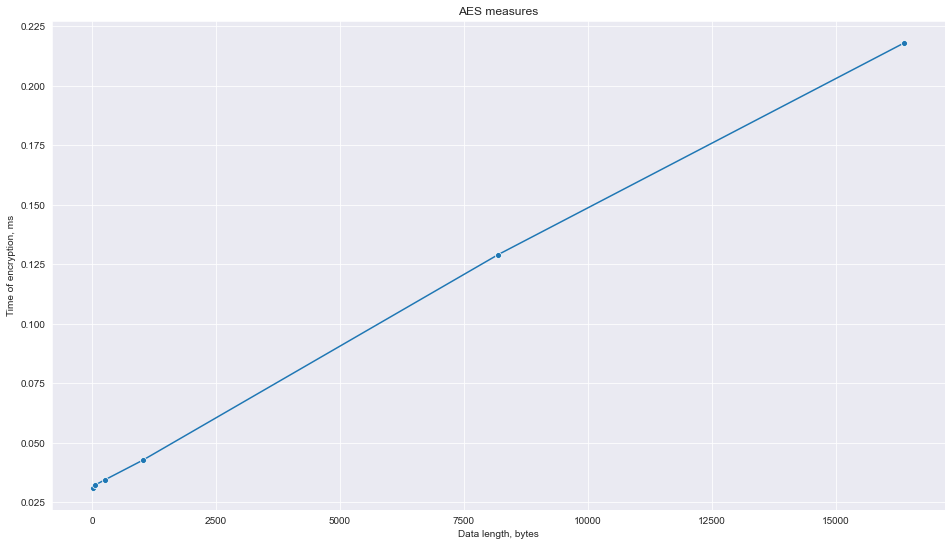

[0.0311, 0.0322, 0.0343, 0.0426, 0.129, 0.218]

In [ ]:
plot(measures, blocks, 'AES')

In [ ]:
measures = []
for block in blocks:
    data = get_random_bytes(block)
    a = %timeit -o hash_ = SHA256.new(data).digest()
#      -o ct = cipher.encrypt(pad(data, AES.block_size))
    measures.append(a)

31.1 µs ± 1.45 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
32.2 µs ± 1.14 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
34.3 µs ± 2.14 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
42.6 µs ± 1.14 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
129 µs ± 6.33 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
218 µs ± 5.21 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


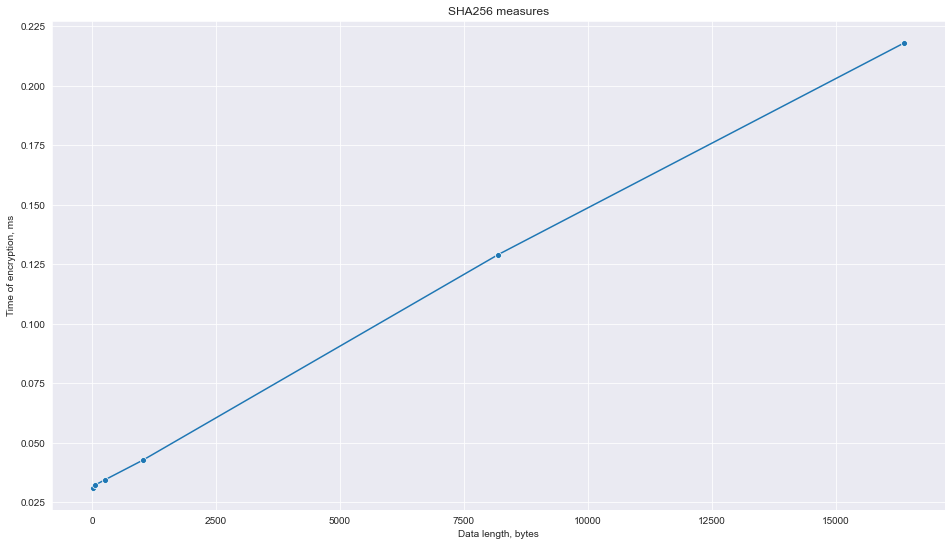

[0.0311, 0.0322, 0.0343, 0.0426, 0.129, 0.218]

In [ ]:
plot(measures, blocks, 'SHA256')